# Compute RoC for a Classification Model

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# data doesn't have headers, so let's create headers
_headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian']
# read in cars dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00472/caesarian.csv.arff', names=_headers, index_col=None, skiprows=15)
df.head()

# target column is 'Caesarian'

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [3]:
# target column is 'Caesarian'

features = df.drop(['Caesarian'], axis=1).values
labels = df[['Caesarian']].values

# split 80% for training and 20% into an evaluation set
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.3, random_state=0)

# further split the evaluation set into validation and test sets of 10% each
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [4]:
# train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/robert/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robert/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# make predictions for the validation dataset
y_proba = model.predict_proba(X_val)

In [6]:
# import libraries
from sklearn.metrics import roc_curve

In [7]:
_false_positive, _true_positive, _thresholds = roc_curve(y_val, y_proba[:, 0])

In [8]:
print(_false_positive)

[0.         0.16666667 0.16666667 0.33333333 0.33333333 0.5
 0.5        0.66666667 0.66666667 1.         1.        ]


In [9]:
print(_true_positive)

[0.         0.         0.16666667 0.16666667 0.33333333 0.33333333
 0.5        0.5        0.66666667 0.66666667 1.        ]


In [10]:
print(_thresholds)

[1.68441119 0.68441119 0.67020858 0.63036858 0.61095531 0.59706329
 0.54652164 0.49336642 0.48977502 0.4030219  0.16645982]


In [11]:
# Plot the RoC
import matplotlib.pyplot as plt
%matplotlib inline

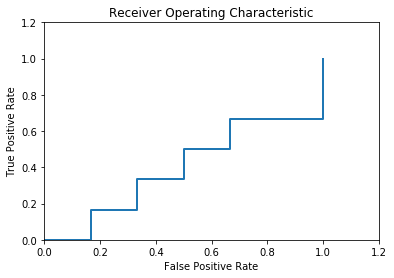

In [12]:
plt.plot(_false_positive, _true_positive, lw=2, label='Receiver Operating Characteristic')
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()